# DallE2: Change Image Background using DallE2 and Azure Computer Vision.

#### Overview:   
In general, many companies spend a significant amount of money each year on photography. However, by leveraging the capabilities of OpenAI, DallE2, and Florence to process images, a wide range of powerful features can be generated from a single image. These features include the ability to create detailed captions, extract color information, generate advertising campaigns based on the image, and even use DallE2 to replace the image's background with a new one derived from the extracted colors and caption information.

### Notebook Organization
-Import Packages and credentials  
-Remove background  
-Extract colors  
-Extract Dense Caption  
-Generate DallE2 prompt  
-Create DallE2 Image  
-Compose 2 images  

## install packages

In [ ]:
!pip install requests
!pip install Pillow
!pip install openai
!pip install azure-cognitiveservices-vision-computervision
!pip install python-dotenv
!pip install azure-storage-blob
!pip install futures
!pip install python-dotenv
!pip install webcolors

## import packages & credential

In [8]:
import requests
import json
from PIL import Image
import openai
import os
import random
import requests
import os
import azure.ai.vision as visionsdk
import time
from collections import defaultdict
import io
import concurrent.futures
from dotenv import load_dotenv  
import logging
from azure.storage.blob import BlobServiceClient, ContentSettings
from io import BytesIO
import string 
import json
from openai import cli
import concurrent.futures
import math
import webcolors
import tempfile

load_dotenv()
connect_str = os.environ.get('connect_str')
container_name = os.environ.get('container_name')
openai.api_type = 'azure'
openai.api_base = os.environ.get('openai.api_base')
openai.api_version = os.environ.get('openai.api_version')
openai.api_key = os.environ.get('openai.api_key')
vision_background_base= os.environ.get('cognitive_background_endpoint')
vision_base= os.environ.get('cognitive_endpoint')
vision_key= os.environ.get('cognitive_key')

# Original Image

In [5]:
from IPython.display import Image

# Replace "image_url" with the actual URL of the image you want to display
image_url = "https://cdn.download.ams.birds.cornell.edu/api/v1/asset/125818161/1800"

# Display the image
Image(url=image_url)

## Remove background  

#### By utilizing Azure Florence's background removal feature, it is possible to obtain a binary image that contains only the removed background data.

In [2]:
def background_removal(image_url):
  url = vision_background_base
  image = image_url

  payload = json.dumps({
    "url": image
  })
  headers = {
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': vision_key
  }

  response = requests.request("POST", url, headers=headers, data=payload)
  removal = response.content
  # Save the response content to a file

  removal = response.content
  return removal


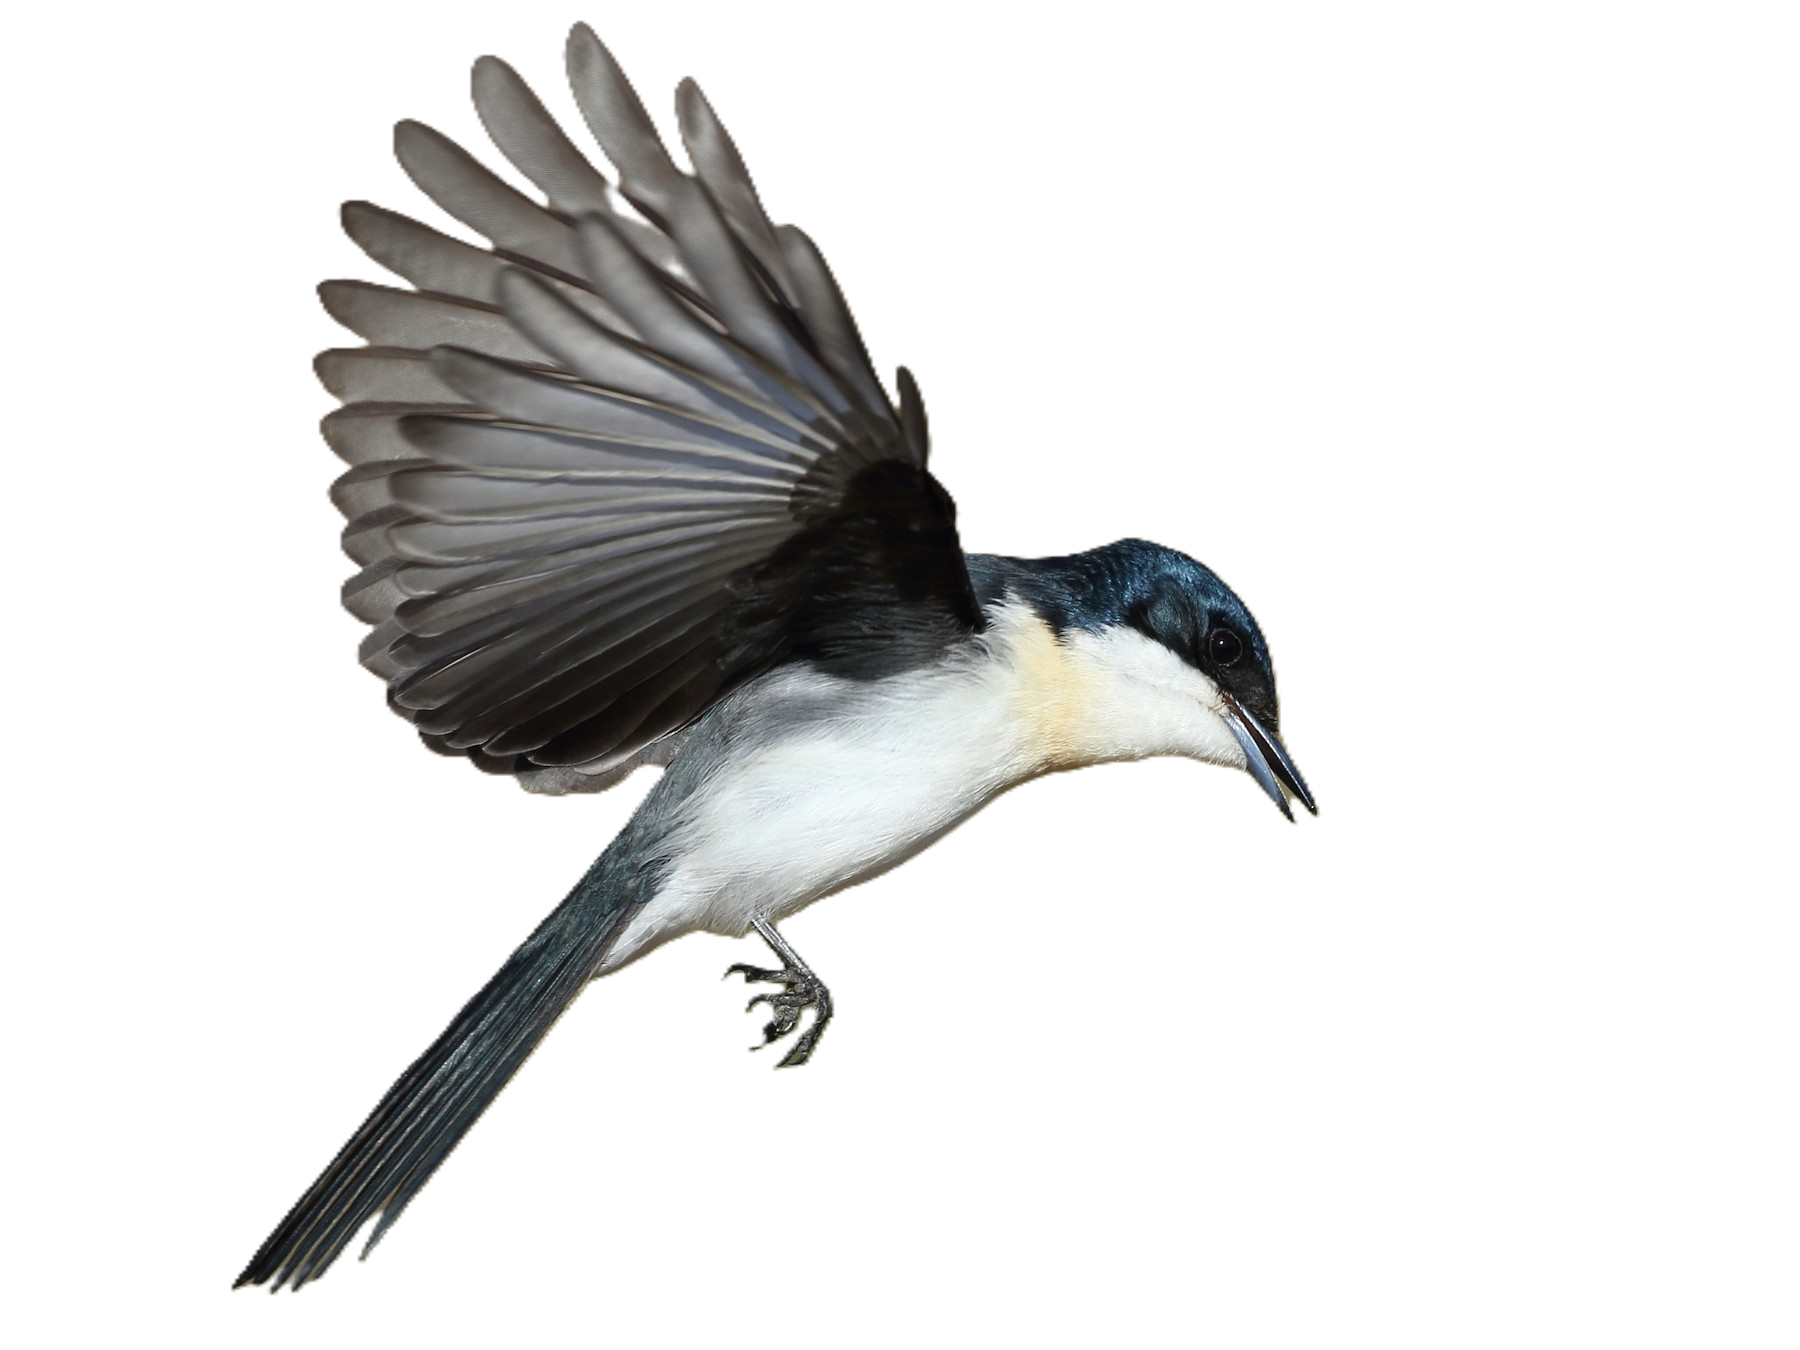

In [3]:
image_url = "https://cdn.download.ams.birds.cornell.edu/api/v1/asset/125818161/1800"

removal=background_removal(image_url)

# Create a PIL Image object from the image data
img = Image.open(BytesIO(removal))

display(img)